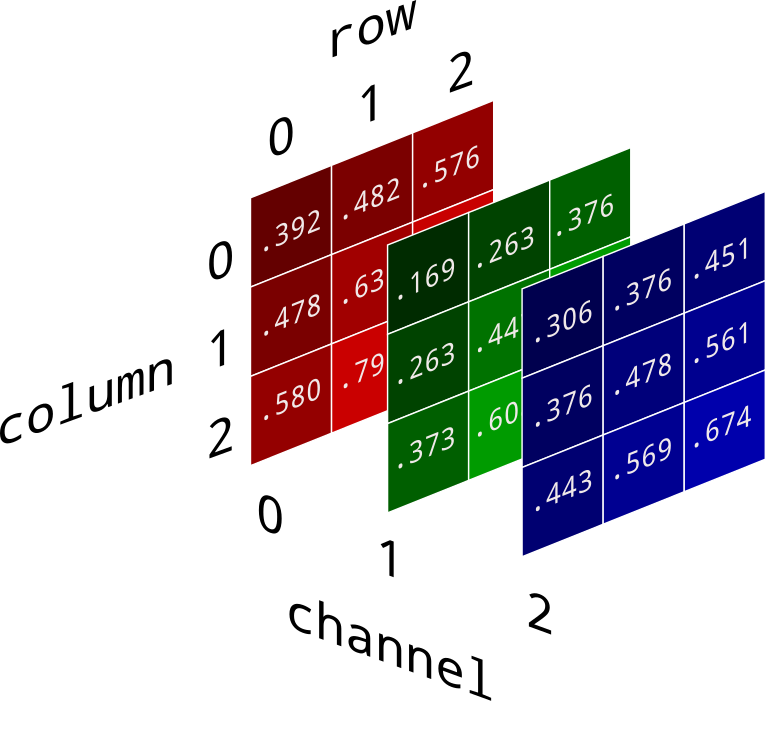

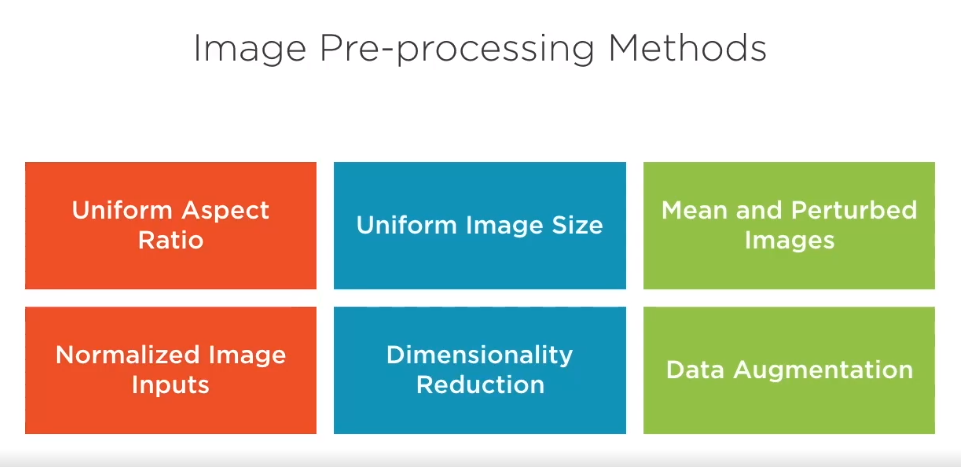

In [2]:
!pip3 install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 KB 4.9 MB/s eta 0:00:007.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 KB 4.7 MB/s eta 0:00:006.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import skimage
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from   skimage import io

In [8]:
## createring a 2D grey scale image . Grey scale image has only 1 channel
random_image = np.random.random([500,500])

In [9]:
random_image

array([[0.34400687, 0.48774386, 0.78625849, ..., 0.14562788, 0.22930798,
        0.06552092],
       [0.28856286, 0.17845412, 0.54338183, ..., 0.66365601, 0.0764009 ,
        0.24352441],
       [0.0636763 , 0.01750037, 0.5342664 , ..., 0.51342057, 0.62279589,
        0.07745054],
       ...,
       [0.65297685, 0.7898039 , 0.93483905, ..., 0.54807283, 0.84992666,
        0.55223741],
       [0.09428498, 0.05801235, 0.99864764, ..., 0.66206368, 0.28703662,
        0.37706954],
       [0.78791577, 0.26814837, 0.74548435, ..., 0.98882333, 0.48748081,
        0.23200854]])

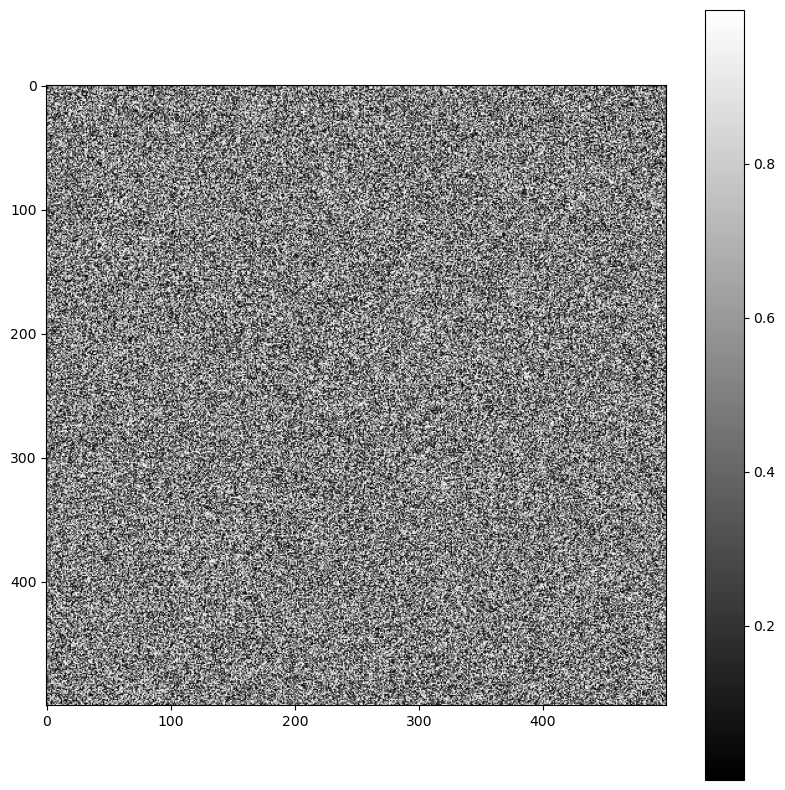

In [12]:
## display the image
plt.figure(figsize = (10,10))
plt.imshow(random_image,cmap="gray")
plt.colorbar()

In [13]:
from skimage import data

In [15]:
## import random camera image from the library
camera = data.camera()
print(camera)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


In [17]:
print("Type :  ",type(camera))
print("DType : ",camera.dtype)
print("Shape : ",camera.shape)
print("size :  ",camera.size)


Type :   <class 'numpy.ndarray'>
DType :  uint8
Shape :  (512, 512)
size :   262144


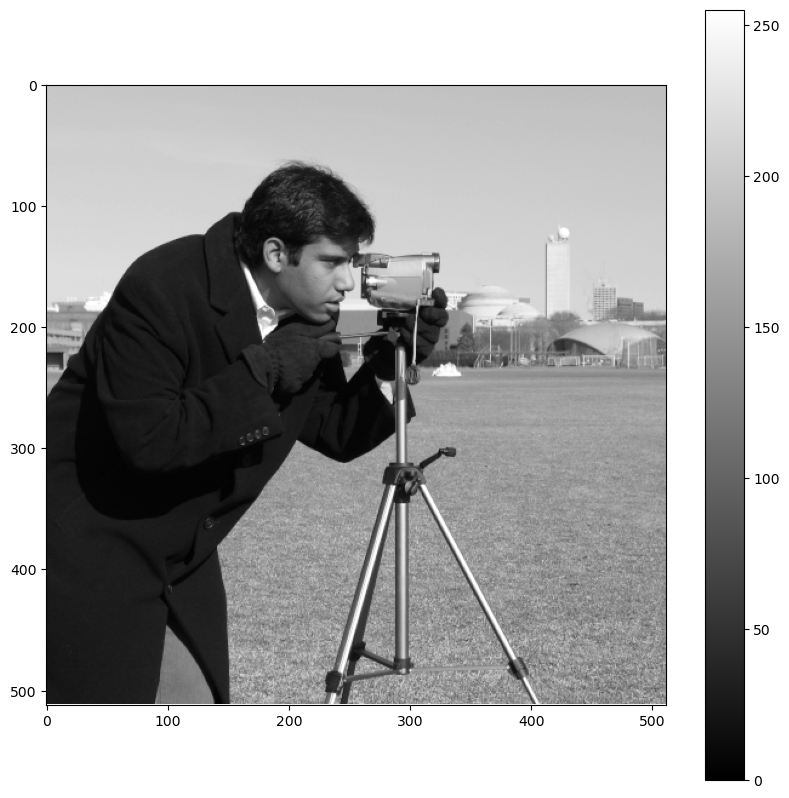

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(camera,cmap = "gray")
plt.colorbar()

In [21]:
## import data from the dataset directory
chessboard = io.imread("./datasets/images/chessboard.jpg")

In [22]:
print("Type :  ",type(chessboard))
print("DType : ",chessboard.dtype)
print("Shape : ",chessboard.shape)
print("size :  ",chessboard.size)

Type :   <class 'numpy.ndarray'>
DType :  uint8
Shape :  (2048, 2048, 3)
size :   12582912


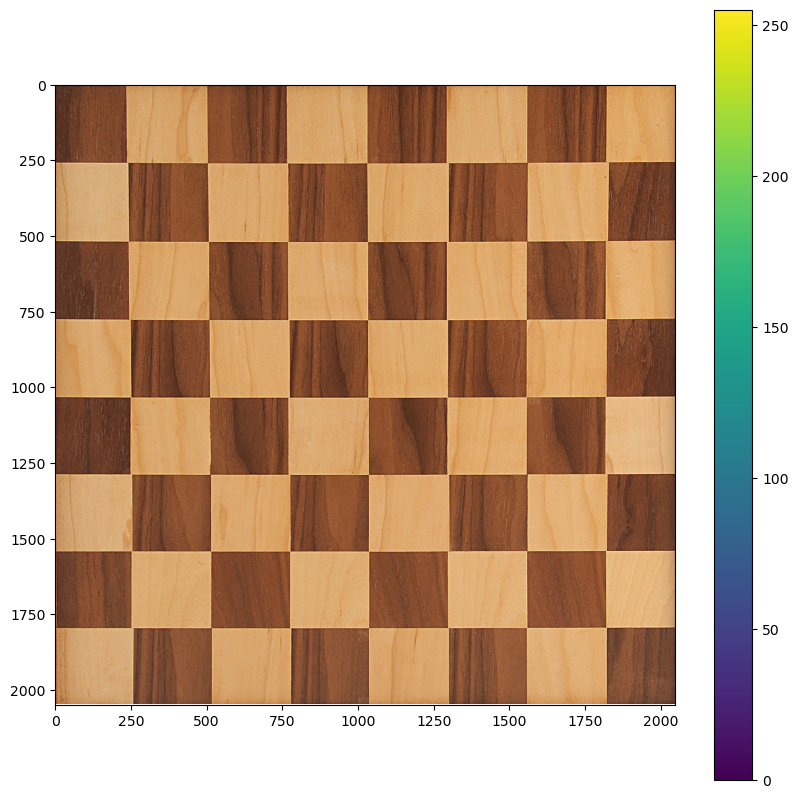

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(chessboard)
plt.colorbar()

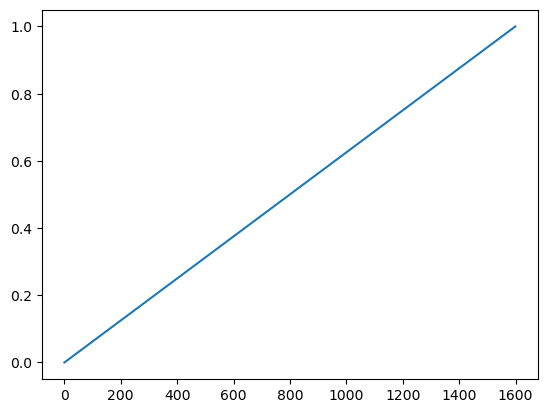

In [29]:
## image can be represented by the o-1 scale
## or 0 to 255 scale
## np.linspace willl generate evenly spaced value over a specfic range
start   = 0
end     = 1
samples = 1600
sample1 = np.linspace(start,end,samples)
plt.plot(sample1)

In [30]:
## reshape it to 40,40
sample_1 = sample1.reshape((40,40))

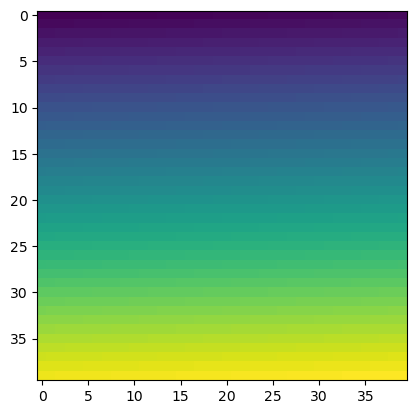

In [31]:
plt.imshow(sample_1)

In [32]:
sample_2 = np.linspace(0,255,1600).reshape((40,40)).astype(np.uint8)

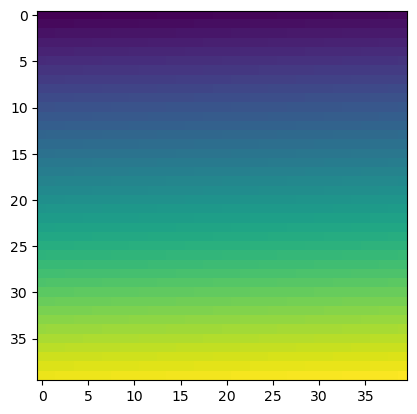

In [34]:
plt.imshow(sample_2)

In [35]:
## you should go for 0-1 ml model wok best if the range is narrow
## chnaging the datatypeof the image
from skimage import img_as_float,img_as_ubyte

In [36]:
image = data.coffee()

In [37]:
image_ubyte = img_as_ubyte(image)

## this method can change the range of the image
## manually we can divide he image with 255.0 too
image_float = img_as_float(image)


In [38]:
def type_min_max(image):
    print("type: {} \n min : {} \n max : {} ".format(image.dtype,image.min(),image.max()))

In [39]:
type_min_max(image_ubyte)

type: uint8 
 min : 0 
 max : 255 


In [40]:
type_min_max(image_float)

type: float64 
 min : 0.0 
 max : 1.0 


In [41]:
### reading anothe rimage and 
### change the rgb coloring of that image
image = io.imread("./datasets/images/machu_pichho_peru.jpg")

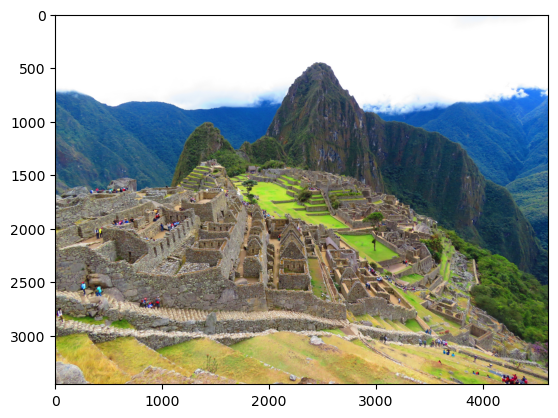

In [42]:
plt.imshow(image)

Text(0.5, 1.0, 'Blue Channel')

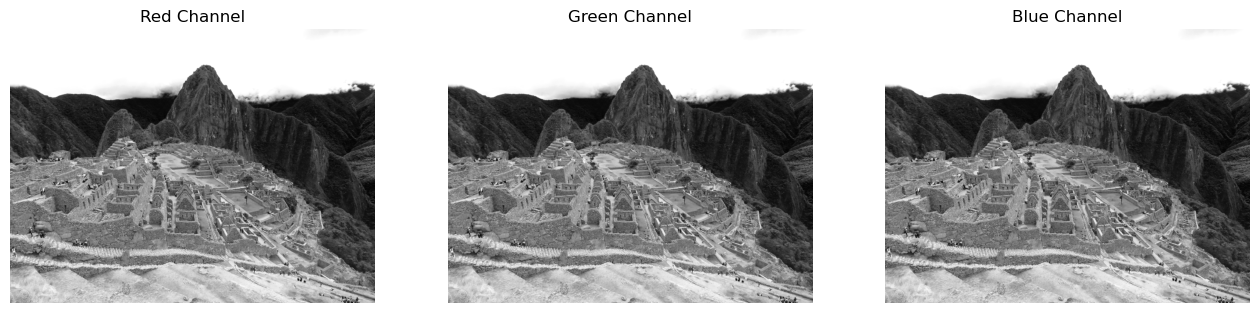

In [50]:
### extracting the three channel
red   = image[:,:,0]
green = image[:,:,1]
blue  = image[:,:,2]
_,sections = plt.subplots(1,3,figsize = (16,5))


for ax in sections:
    ax.axis('off')
(r_section,g_section,b_section) = sections
r_section.imshow(red,cmap="gray")
r_section.set_title("Red Channel")
g_section.imshow(red,cmap="gray")
g_section.set_title("Green Channel")
b_section.imshow(red,cmap="gray")
b_section.set_title("Blue Channel")


In [51]:
### loading another package image
astronaut = data.astronaut()
type_min_max(astronaut)

type: uint8 
 min : 0 
 max : 255 


In [56]:
def plot_the_single_image(image):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.colorbar()

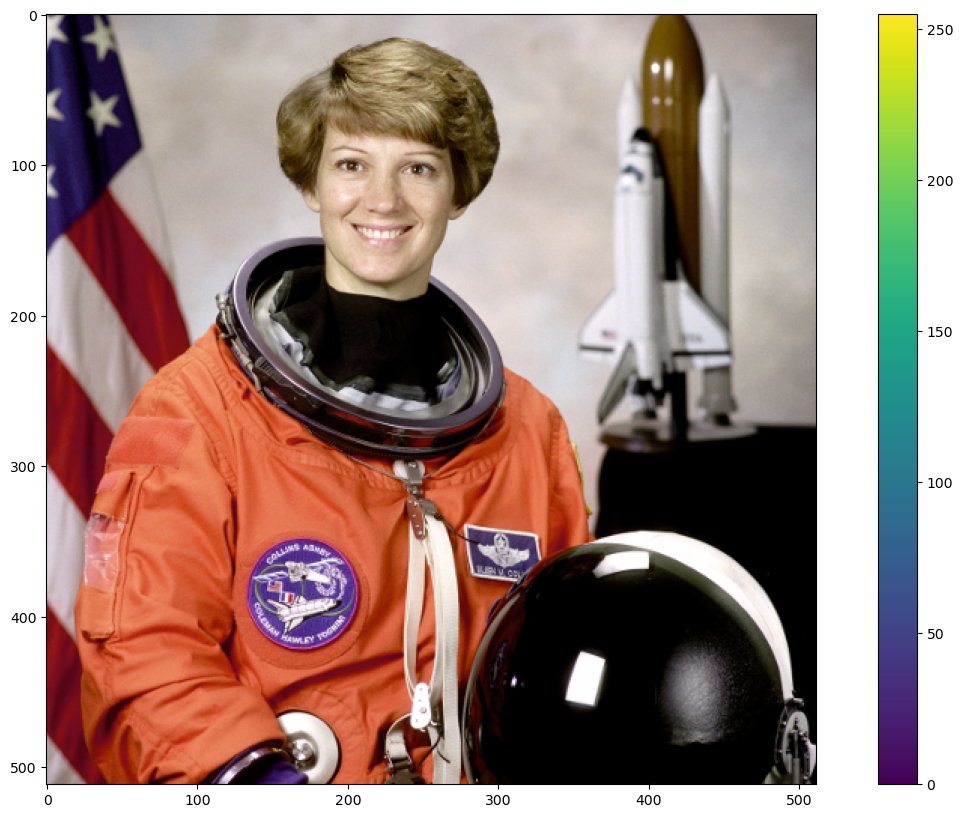

In [55]:
plot_the_single_image(astronaut)

In [71]:
### problem
### 1) you will find the red channel
### 2) in this if any pixel is greater than 160 you change it to blue pixel
## understand properly why i will assign (0,0,255) and not just 255
## every array has 